In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emachine as EM

In [2]:
np.random.seed(0)

In [3]:
seqs = np.loadtxt('s_train.dat')

In [4]:
ops = EM.operators(seqs)
ops.shape

(472, 666)

In [5]:
eps_list = np.linspace(0.7,0.9,21)
E_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):    
    w_eps[i,:],E_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    print(eps,E_eps[i])

0.7 -77.08261130572443
0.71 -76.35481261138898
0.72 -75.6744255963754
0.73 -75.04193692368902
0.74 -74.45807132107244
0.75 -73.92382594084789
0.76 -73.44051315952952
0.77 -73.00981381452895
0.78 -72.63384353756513
0.79 -72.31523575663353
0.8 -72.0572462054167
0.81 -71.86388555853011
0.8200000000000001 -71.74008934398942
0.8300000000000001 -71.69193794521124
0.84 -71.72694488631134
0.85 -71.85443965342519
0.86 -72.08608362186064
0.87 -72.43657691061202
0.88 -72.92464483156341
0.89 -73.57444340699423
0.9 -74.41760975274914


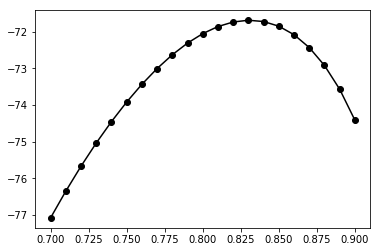

In [6]:
plt.plot(eps_list,E_eps,'ko-')

In [7]:
ieps = np.argmax(E_eps)
print('The optimal value of eps:',eps_list[ieps])

The optimal value of eps: 0.8300000000000001


So our inferred interactions from our eps machine should be

In [8]:
w_em = w_eps[ieps]

np.savetxt('w_em.dat',w_em,fmt='%f')

In [9]:
## # Maximum Likelihood Estimation (MLE)
#w_mle = EM.MLE_method(seqs)
#np.savetxt('w_mle.dat',w_mle,fmt='%f')

# Pseudo Likelihood Estimation (PLE)
w_ple = EM.PLE_method(seqs)
np.savetxt('w_ple.dat',w_ple,fmt='%f')

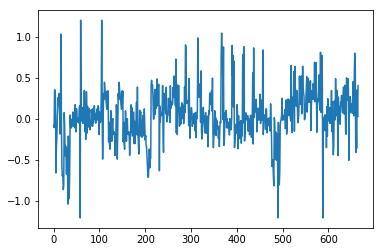

In [10]:
plt.plot(w_em)